There are various techniques which are used in this report. The analysis and implementation of these techniques were conducted using AI tools and methods to enhance accuracy and efficiency in processing and segmenting images.

In [ ]:
!pip install -q pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving assignment1_train_test_data.zip to assignment1_train_test_data.zip


In [ ]:
from zipfile import ZipFile
file_name = "assignment1_train_test_data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
# ground truth training data
from google.colab import files
uploaded = files.upload()

Saving ISIC_0000002_Segmentation.png to ISIC_0000002_Segmentation.png
Saving ISIC_0000004_Segmentation.png to ISIC_0000004_Segmentation.png
Saving ISIC_0000009_Segmentation.png to ISIC_0000009_Segmentation.png
Saving ISIC_0000016_Segmentation.png to ISIC_0000016_Segmentation.png
Saving ISIC_0000017_Segmentation.png to ISIC_0000017_Segmentation.png
Saving ISIC_0000025_Segmentation.png to ISIC_0000025_Segmentation.png
Saving ISIC_0000026_Segmentation.png to ISIC_0000026_Segmentation.png
Saving ISIC_0000029_Segmentation.png to ISIC_0000029_Segmentation.png
Saving ISIC_0000031_Segmentation.png to ISIC_0000031_Segmentation.png
Saving ISIC_0000032_Segmentation.png to ISIC_0000032_Segmentation.png


In [ ]:
# ground truth test data
from google.colab import files
uploaded = files.upload()

Saving ISIC_0000013_Segmentation.png to ISIC_0000013_Segmentation.png
Saving ISIC_0000022_Segmentation.png to ISIC_0000022_Segmentation.png
Saving ISIC_0000052_Segmentation.png to ISIC_0000052_Segmentation.png
Saving ISIC_0000141_Segmentation.png to ISIC_0000141_Segmentation.png
Saving ISIC_0000164_Segmentation.png to ISIC_0000164_Segmentation.png
Saving ISIC_0000195_Segmentation.png to ISIC_0000195_Segmentation.png
Saving ISIC_0000258_Segmentation.png to ISIC_0000258_Segmentation.png
Saving ISIC_0000287_Segmentation.png to ISIC_0000287_Segmentation.png
Saving ISIC_0000340_Segmentation.png to ISIC_0000340_Segmentation.png
Saving ISIC_0000343_Segmentation.png to ISIC_0000343_Segmentation.png


Preprocessed Benign and Malignant Images from the Training Data

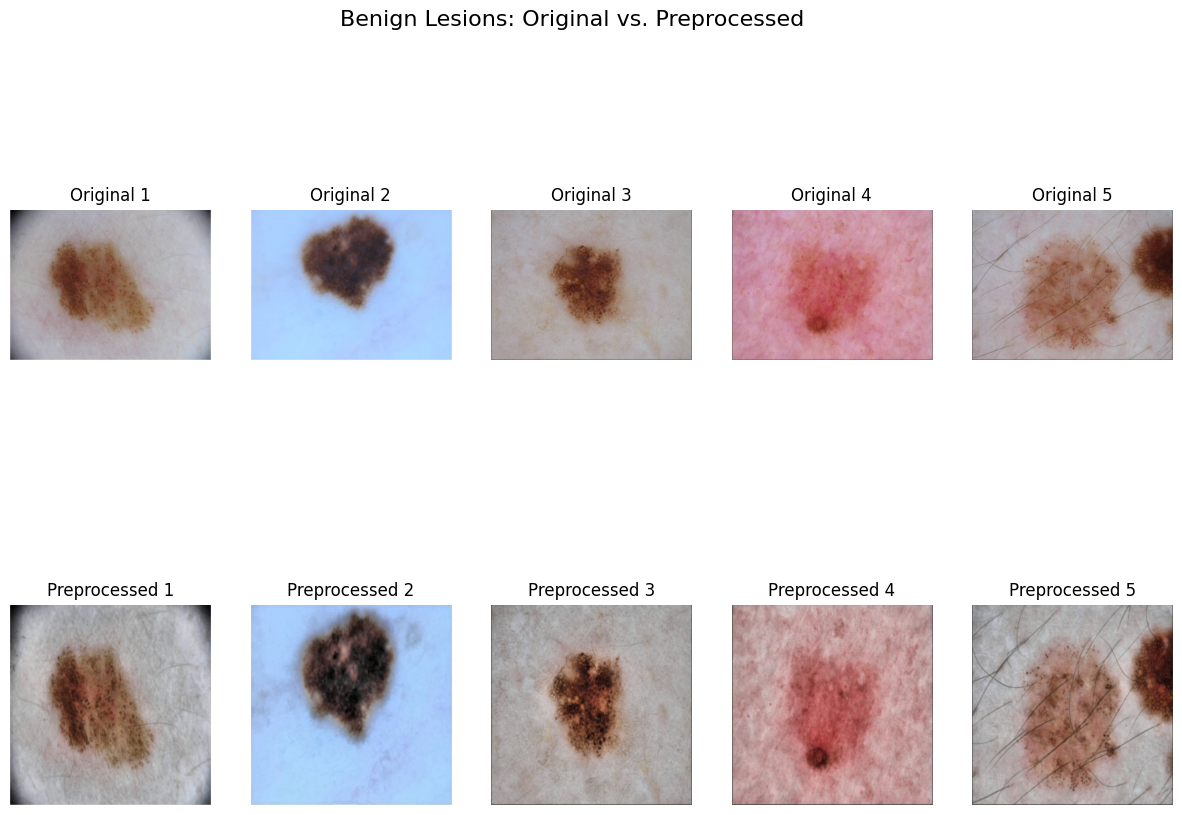

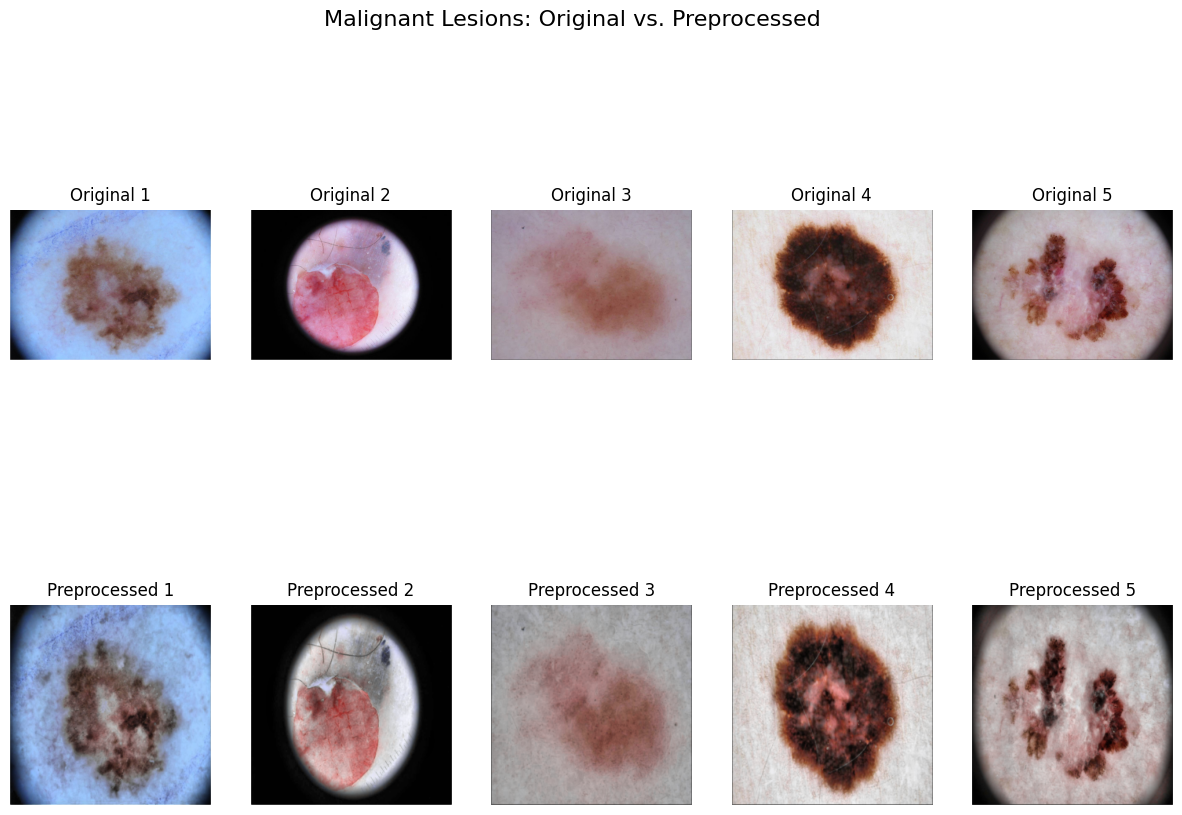

Preprocessing and visualization completed.


In [ ]:
import numpy as np
from skimage import io, exposure, transform, filters
import matplotlib.pyplot as plt
import os

benign_cases = [
    "ISIC_0000009", "ISIC_0000016", "ISIC_0000017", "ISIC_0000025", "ISIC_0000032"
]

malignant_cases = [
    "ISIC_0000002", "ISIC_0000004", "ISIC_0000026", "ISIC_0000029", "ISIC_0000031"
]

image_dir = '/content/assign_train'

# Paths to benign and malignant images
benign_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in benign_cases]
malignant_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in malignant_cases]

def load_images(image_paths):
    images = []
    for path in image_paths:
        try:
            img = io.imread(path)
            images.append(img)
        except FileNotFoundError:
            print(f"File not found: {path}")
    return images

# Preprocess images
def preprocess_images(images, target_size=(256, 256)):
    preprocessed_images = []
    for img in images:
        img_filtered = filters.median(img)
        img_contrast_enhanced = exposure.equalize_adapthist(img_filtered)
        img_resized = transform.resize(img_contrast_enhanced, target_size)
        preprocessed_images.append(img_resized)
    return np.array(preprocessed_images)

# Function to visualize original and preprocessed images side by side
def visualize_comparison(original_images, preprocessed_images, title, num_images=5):
    plt.figure(figsize=(15, 10))

    for i in range(num_images):
        if i >= len(original_images) or i >= len(preprocessed_images):
            break  # Avoid index errors if fewer images are available

        # Display original image (Top Row)
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[i])
        plt.title(f"Original {i+1}")
        plt.axis('off')

        # Display preprocessed image (Bottom Row)
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(preprocessed_images[i])
        plt.title(f"Preprocessed {i+1}")
        plt.axis('off')

    plt.suptitle(title, fontsize=16)
    plt.show()

# Load and preprocess images
benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

preprocessed_benign_images = preprocess_images(benign_images)
preprocessed_malignant_images = preprocess_images(malignant_images)

# Visualize benign images
if len(benign_images) > 0 and len(preprocessed_benign_images) > 0:
    visualize_comparison(benign_images, preprocessed_benign_images, title="Benign Lesions: Original vs. Preprocessed")

# Visualize malignant images
if len(malignant_images) > 0 and len(preprocessed_malignant_images) > 0:
    visualize_comparison(malignant_images, preprocessed_malignant_images, title="Malignant Lesions: Original vs. Preprocessed")


print("Preprocessing and visualization completed.")


Average Histogram for benign and malignant images from the Training Data

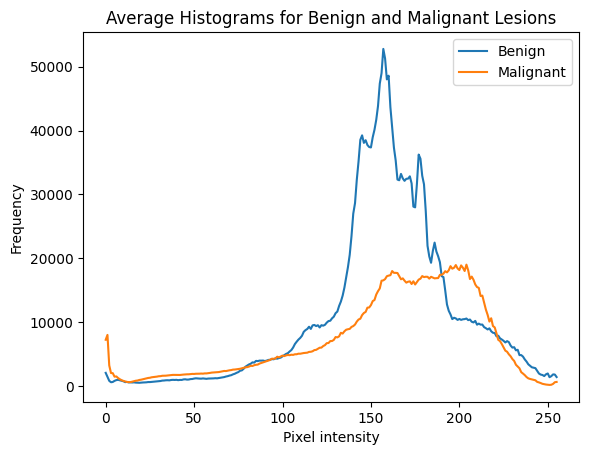

In [ ]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt
import os

benign_cases = [
    "ISIC_0000009", "ISIC_0000016", "ISIC_0000017", "ISIC_0000025", "ISIC_0000032",
    "ISIC_0000044", "ISIC_0000050", "ISIC_0000077", "ISIC_0000081", "ISIC_0000096",
    "ISIC_0000130", "ISIC_0000216", "ISIC_0000217", "ISIC_0000225", "ISIC_0000251",
    "ISIC_0000263", "ISIC_0000275", "ISIC_0000324", "ISIC_0000360", "ISIC_0000361",
    "ISIC_0000365", "ISIC_0000383", "ISIC_0000385", "ISIC_0000416", "ISIC_0000475",
    "ISIC_0000483", "ISIC_0000492", "ISIC_0000506", "ISIC_0000529", "ISIC_0001254",
    "ISIC_0002093", "ISIC_0002206", "ISIC_0002287", "ISIC_0002459", "ISIC_0004110",
    "ISIC_0004309", "ISIC_0005555", "ISIC_0006114", "ISIC_0006612", "ISIC_0006940",
    "ISIC_0007038", "ISIC_0008256", "ISIC_0008552", "ISIC_0008879", "ISIC_0009947",
    "ISIC_0009979", "ISIC_0009987", "ISIC_0010025", "ISIC_0010071", "ISIC_0010101",
    "ISIC_0010178", "ISIC_0010205", "ISIC_0010223", "ISIC_0010252", "ISIC_0010256",
    "ISIC_0010264", "ISIC_0010318", "ISIC_0010325", "ISIC_0010339", "ISIC_0010341",
    "ISIC_0010439", "ISIC_0010459", "ISIC_0010465", "ISIC_0010562", "ISIC_0010568",
    "ISIC_0010848", "ISIC_0010851", "ISIC_0010861", "ISIC_0011116", "ISIC_0011120",
    "ISIC_0011296", "ISIC_0011328", "ISIC_0011331", "ISIC_0011347", "ISIC_0011398"
]

malignant_cases = [
    "ISIC_0000002", "ISIC_0000004", "ISIC_0000026", "ISIC_0000029", "ISIC_0000031",
    "ISIC_0000035", "ISIC_0000049", "ISIC_0000078", "ISIC_0000140", "ISIC_0000143",
    "ISIC_0000145", "ISIC_0000146", "ISIC_0000148", "ISIC_0000150", "ISIC_0000151",
    "ISIC_0000153", "ISIC_0000156", "ISIC_0000171", "ISIC_0000173", "ISIC_0000277",
    "ISIC_0000280", "ISIC_0000285", "ISIC_0000290", "ISIC_0000292", "ISIC_0000293",
    "ISIC_0000297", "ISIC_0000307", "ISIC_0000412", "ISIC_0000463", "ISIC_0000469",
    "ISIC_0000520", "ISIC_0000521", "ISIC_0000522", "ISIC_0000552", "ISIC_0001126",
    "ISIC_0001134", "ISIC_0001140", "ISIC_0001148", "ISIC_0009905", "ISIC_0009934",
    "ISIC_0009950", "ISIC_0009971", "ISIC_0010029", "ISIC_0010036", "ISIC_0010054",
    "ISIC_0010194", "ISIC_0010225", "ISIC_0010235", "ISIC_0010241", "ISIC_0010265",
    "ISIC_0010266", "ISIC_0010321", "ISIC_0010350", "ISIC_0010358", "ISIC_0010364",
    "ISIC_0010372", "ISIC_0010380", "ISIC_0010441", "ISIC_0010466", "ISIC_0010468",
    "ISIC_0010495", "ISIC_0010576", "ISIC_0010860", "ISIC_0011099", "ISIC_0011126",
    "ISIC_0011136", "ISIC_0011137", "ISIC_0011139", "ISIC_0011163", "ISIC_0011210",
    "ISIC_0011295", "ISIC_0011315", "ISIC_0011329", "ISIC_0011334", "ISIC_0011390"
]

image_dir = '/content/assign_train'

benign_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in benign_cases]
malignant_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in malignant_cases]

def load_images(image_paths):
    images = []
    for path in image_paths:
        try:
            img = io.imread(path)
            images.append(img)
        except FileNotFoundError:
            print(f"File not found: {path}")
    return images

def compute_histograms(images):
    histograms = []
    for img in images:
        gray_img = color.rgb2gray(img)
        hist, _ = exposure.histogram(gray_img)
        histograms.append(hist)
    return np.array(histograms)

def average_histogram(histograms):
    return np.mean(histograms, axis=0)

# Load benign and malignant images
benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

# Compute histograms for benign and malignant images
benign_histograms = compute_histograms(benign_images)
malignant_histograms = compute_histograms(malignant_images)

# Calculate average histograms for benign and malignant images
average_benign_histogram = average_histogram(benign_histograms)
average_malignant_histogram = average_histogram(malignant_histograms)

# Plot average histograms for benign and malignant images
plt.figure()
plt.plot(average_benign_histogram, label='Benign')
plt.plot(average_malignant_histogram, label='Malignant')
plt.title('Average Histograms for Benign and Malignant Lesions')
plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Analysing the histogram of just the lesion, and comparing it to the histogram of the whole image.

Benign Images:


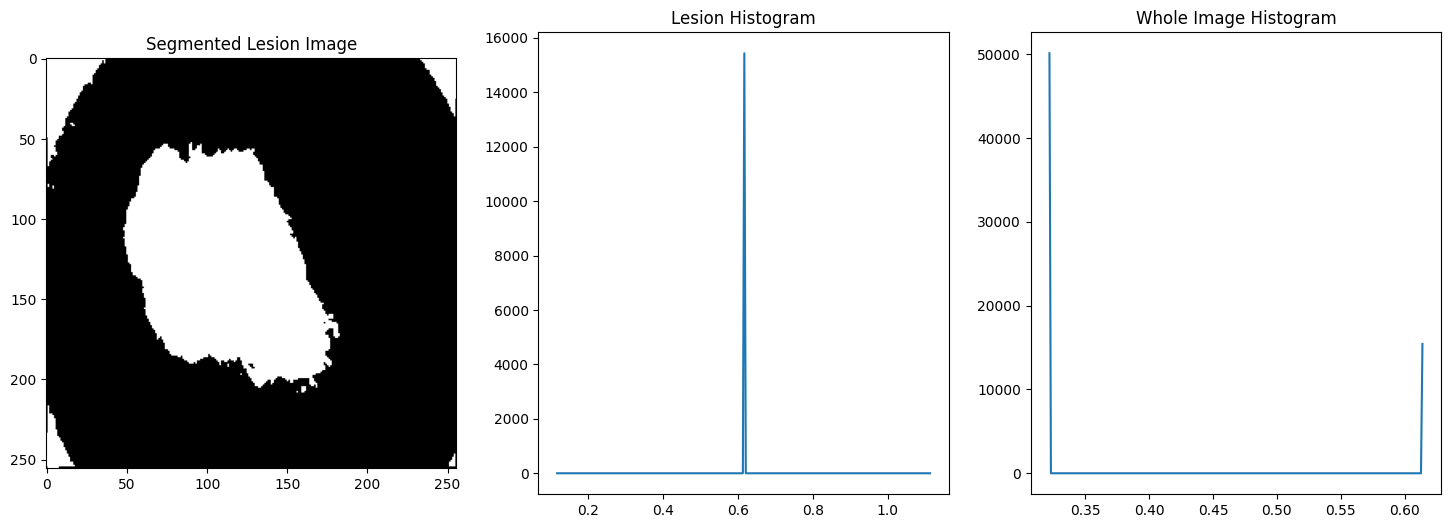

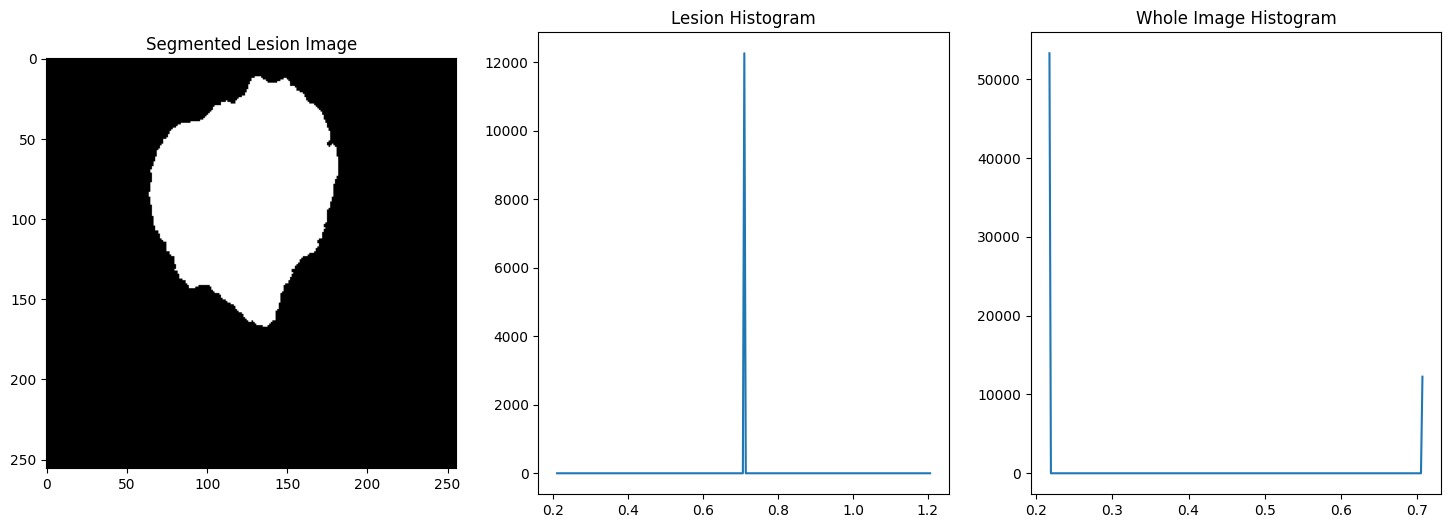

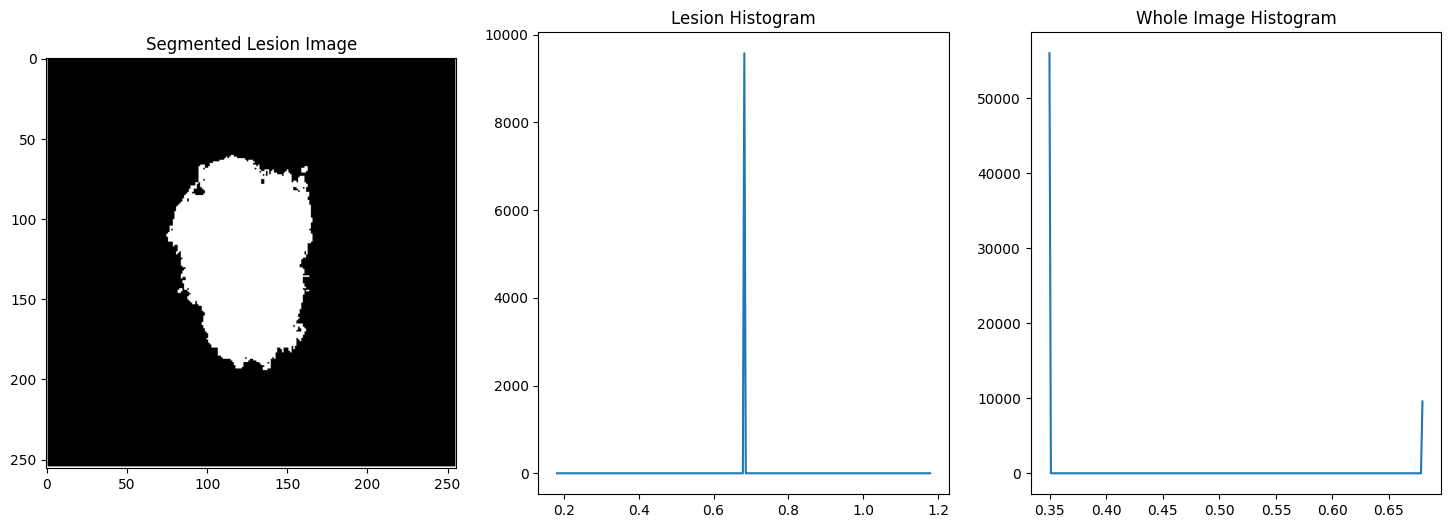

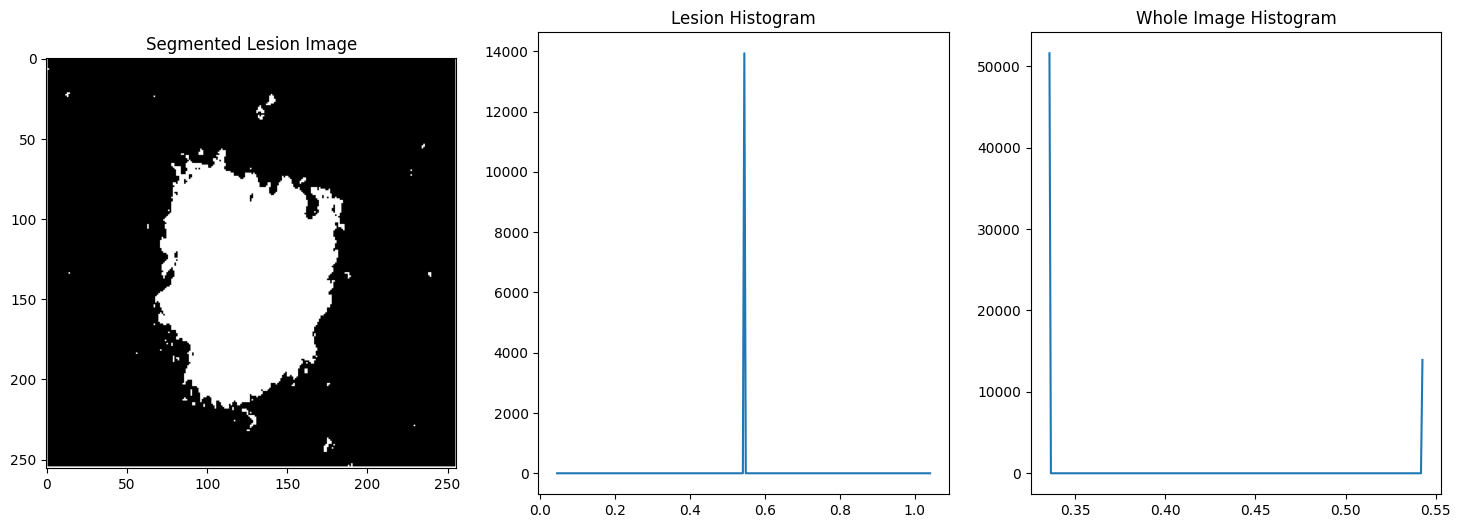

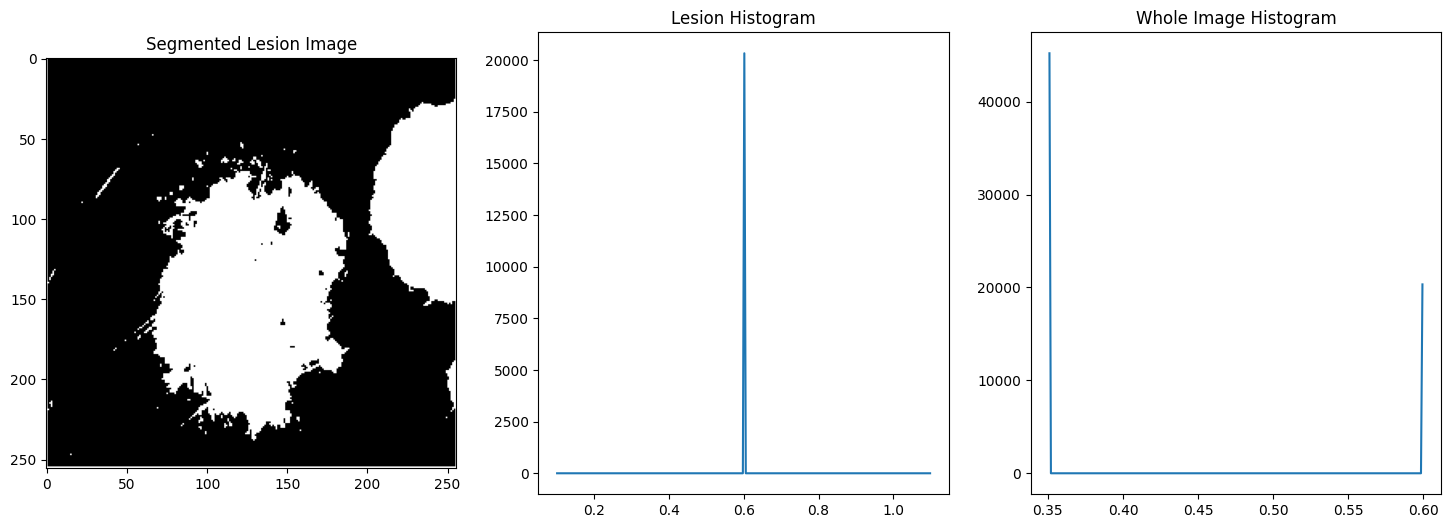

Malignant Images:


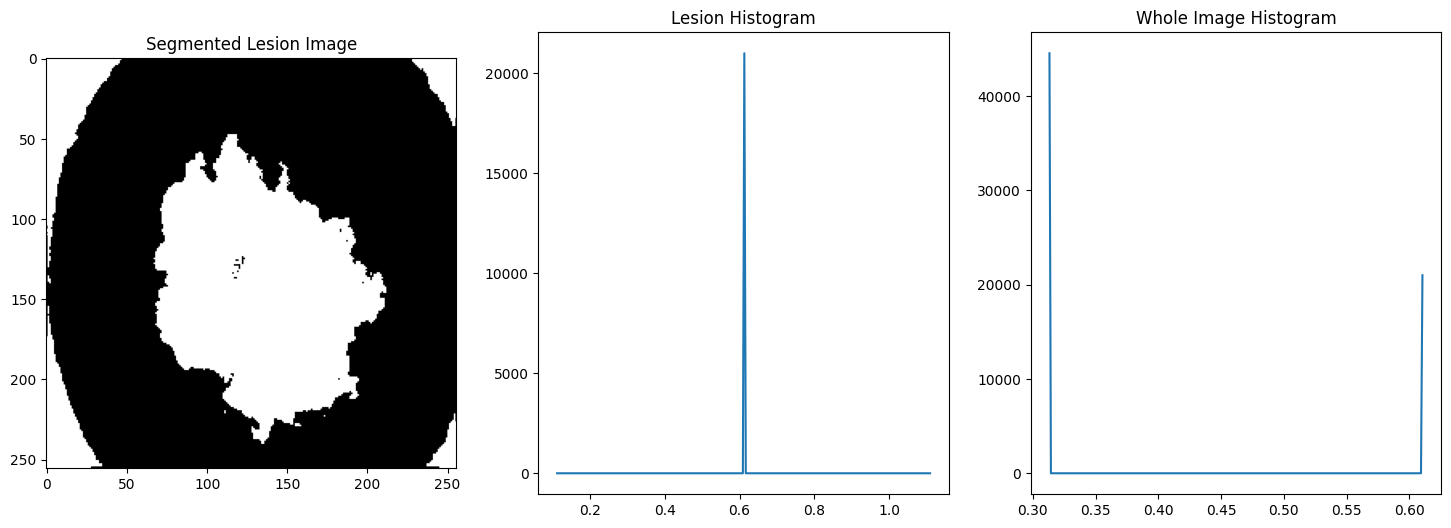

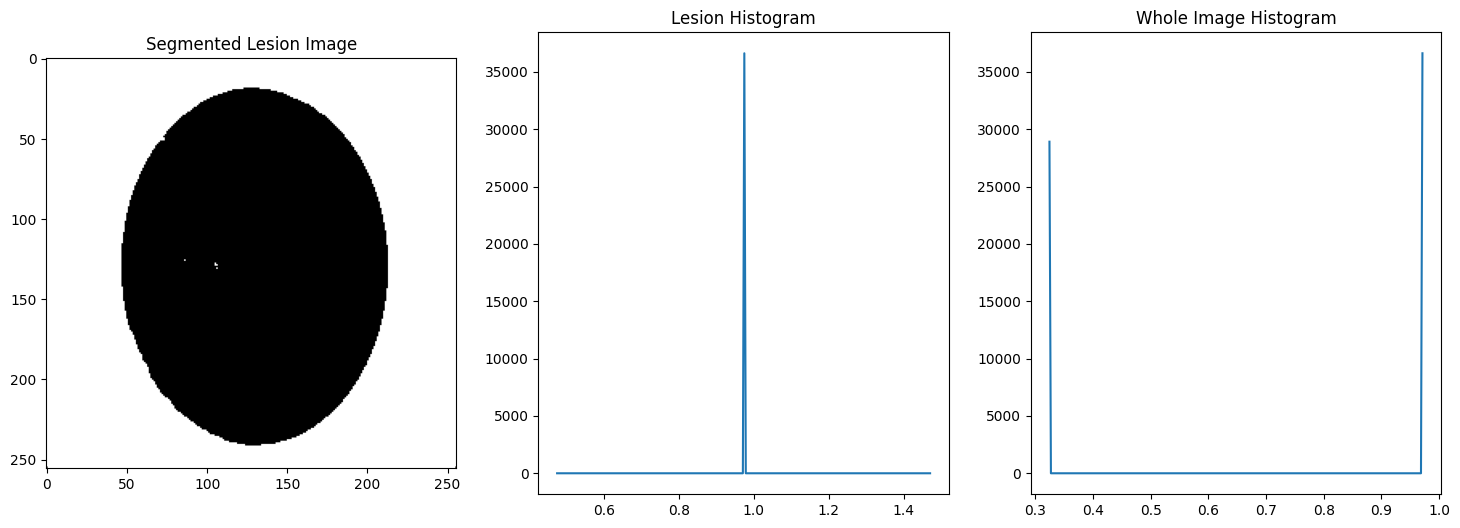

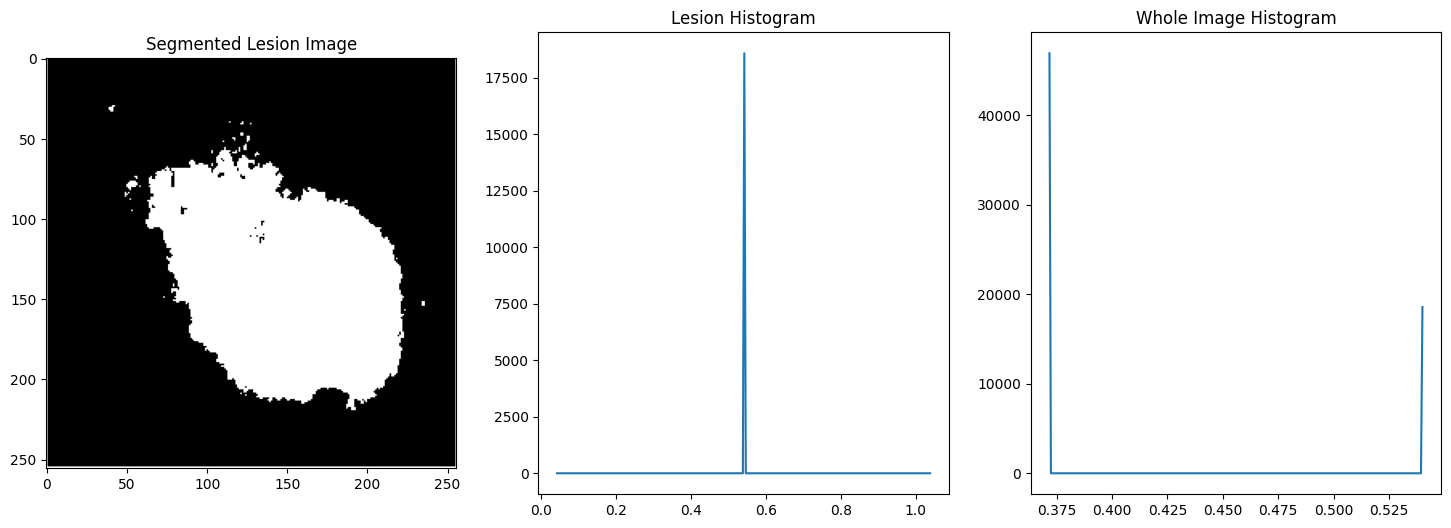

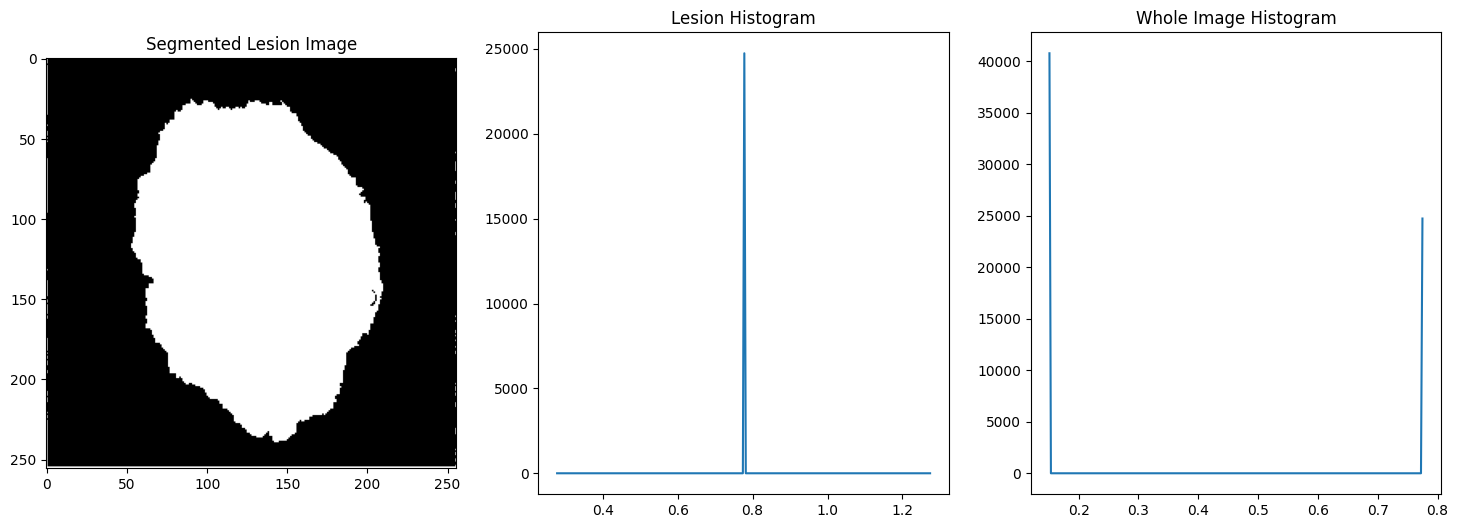

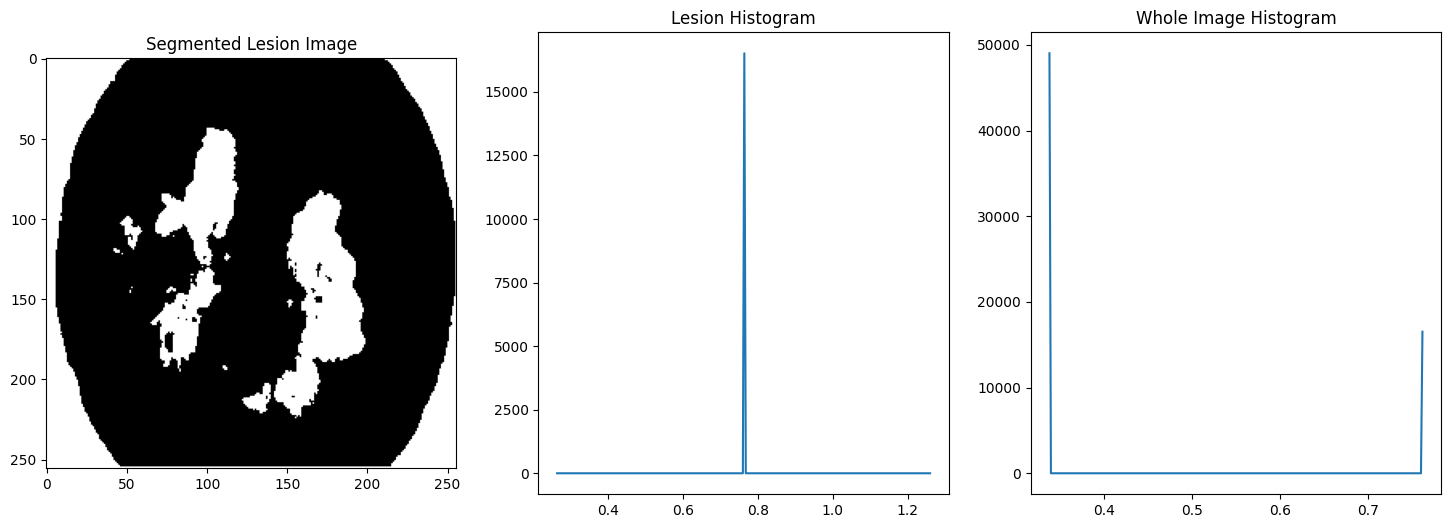

In [ ]:
import numpy as np
from skimage import io, color, exposure, transform, filters
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans

image_dir = '/content/assign_train'

benign_cases = [
    "ISIC_0000009", "ISIC_0000016", "ISIC_0000017", "ISIC_0000025", "ISIC_0000032"
]

malignant_cases = [
    "ISIC_0000002", "ISIC_0000004", "ISIC_0000026", "ISIC_0000029", "ISIC_0000031"
]

benign_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in benign_cases[:5]]
malignant_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in malignant_cases[:5]]

def load_images(image_paths):
    images = []
    for path in image_paths:
        try:
            img = io.imread(path)
            images.append(img)
        except FileNotFoundError:
            print(f"File not found: {path}")
    return images

# Preprocess images
def preprocess_images(images, target_size=(256, 256)):
    preprocessed_images = []
    for img in images:
        img_filtered = filters.median(img)
        img_contrast_enhanced = exposure.equalize_adapthist(img_filtered)
        img_resized = transform.resize(img_filtered, target_size)
        preprocessed_images.append(img_resized)
    return np.array(preprocessed_images)

benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

preprocessed_benign_images = preprocess_images(benign_images)
preprocessed_malignant_images = preprocess_images(malignant_images)

# Clustered images to grayscale and invert colors
def convert_to_grayscale_and_invert(images):
    inverted_images = []
    for img in images:
        gray_img = color.rgb2gray(img)
        inverted_img = 1 - gray_img
        inverted_images.append(inverted_img)
    return inverted_images

# Extracting lesion using K-means clustering and display segmented lesion image along with histograms
def extract_and_compare_histograms(images):
    for img in images:
        # Apply K-means clustering
        pixels = img.reshape(-1, 3)
        kmeans = KMeans(n_clusters=2).fit(pixels)
        clustered_img = kmeans.cluster_centers_[kmeans.labels_]
        clustered_img = clustered_img.reshape(img.shape)

        # Convert to grayscale and invert colors
        inverted_clustered_img = convert_to_grayscale_and_invert([clustered_img])[0]

        # Extract lesion
        lesion_mask = inverted_clustered_img > filters.threshold_mean(inverted_clustered_img)

        # Calculate histograms
        lesion_histogram = exposure.histogram(inverted_clustered_img[lesion_mask])
        whole_histogram = exposure.histogram(inverted_clustered_img)

        # Plot segmented lesion image and histograms
        plt.figure(figsize=(18, 6))

        plt.subplot(1, 3, 1)
        plt.title("Segmented Lesion Image")
        plt.imshow(lesion_mask, cmap='gray')

        plt.subplot(1, 3, 2)
        plt.title("Lesion Histogram")
        plt.plot(lesion_histogram[1], lesion_histogram[0])

        plt.subplot(1, 3, 3)
        plt.title("Whole Image Histogram")
        plt.plot(whole_histogram[1], whole_histogram[0])

        plt.show()

# Compare histograms for benign and malignant images
print("Benign Images:")
extract_and_compare_histograms(preprocessed_benign_images)

print("Malignant Images:")
extract_and_compare_histograms(preprocessed_malignant_images)


Shape features for preprocessed benign and malignant images from the Training Data

In [ ]:
import numpy as np
from skimage import io, color, measure, transform, filters, morphology, exposure
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix

benign_cases = [
    "ISIC_0000009", "ISIC_0000016", "ISIC_0000017", "ISIC_0000025", "ISIC_0000032",
]

malignant_cases = [
    "ISIC_0000002", "ISIC_0000004", "ISIC_0000026", "ISIC_0000029", "ISIC_0000031",
]

image_dir = '/content/assign_train'

benign_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in benign_cases]
malignant_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in malignant_cases]

def load_images(image_paths):
    images = []
    for path in image_paths:
        try:
            img = io.imread(path)
            images.append(img)
        except FileNotFoundError:
            print(f"File not found: {path}")
    return images

# Preprocess images
def preprocess_images(images, target_size=(256, 256)):
    preprocessed_images = []

    for img in images:

        img_filtered = filters.median(img)

        img_contrast_enhanced = exposure.equalize_adapthist(img_filtered)

        img_resized = transform.resize(img_contrast_enhanced, target_size)

        preprocessed_images.append(img_resized)

    return np.array(preprocessed_images)

benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

preprocessed_benign_images = preprocess_images(benign_images)
preprocessed_malignant_images = preprocess_images(malignant_images)

def apply_kmeans(image, n_clusters=2):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(pixels)

    # Replace each pixel value with its corresponding cluster center value
    clustered_img = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape the clustered image back to the original image shape
    clustered_img = clustered_img.reshape(image.shape)

    return clustered_img

def convert_to_grayscale_and_invert(images):
    grayscale_images = [color.rgb2gray(img) for img in images]
    inverted_images = [1 - img for img in grayscale_images]
    return inverted_images

# Apply K-means clustering to benign and malignant images
clustered_benign_images = [apply_kmeans(img) for img in preprocessed_benign_images]
clustered_malignant_images = [apply_kmeans(img) for img in preprocessed_malignant_images]

# Convert clustered images to grayscale and invert colors
inverted_clustered_benign_images = convert_to_grayscale_and_invert(clustered_benign_images)
inverted_clustered_malignant_images = convert_to_grayscale_and_invert(clustered_malignant_images)

# Load ground truth images
ground_truth_image_paths = [
    os.path.join(image_dir, f"{case}_Segmentation.png")
    for case in benign_cases + malignant_cases  # Iterate through both benign and malignant cases
]

ground_truth_images = load_images(ground_truth_image_paths)
ground_truth_images = preprocess_images(ground_truth_images)

# Function to extract shape features
def extract_shape_features(images):
    shape_features = []

    for img in images:
        # Apply threshold to get binary image
        binary_img = img > filters.threshold_mean(img)
        binary_img = morphology.remove_small_objects(binary_img, min_size=500)  # Remove noise
        # Label connected regions
        labeled_img = measure.label(binary_img)
        # Extract region properties
        regions = measure.regionprops(labeled_img)

        for region in regions:
            if region.area < 100:  # Ignore small artifacts
                continue

            # Compute shape features
            perimeter = region.perimeter if region.perimeter > 0 else 1
            compactness = (perimeter ** 2) / (4 * np.pi * region.area)
            convex_hull = morphology.convex_hull_image(binary_img)
            convex_perimeter = measure.perimeter(convex_hull)
            border_irregularity = convex_perimeter / perimeter

            # Compute asymmetry index
            center_x = region.centroid[1]
            left_half = binary_img[:, :int(center_x)]
            right_half = binary_img[:, int(center_x):]
            asymmetry_index = abs(np.sum(left_half) - np.sum(right_half)) / region.area

            features = {
                'area': region.area,
                'perimeter': perimeter,
                'eccentricity': region.eccentricity,
                'solidity': region.solidity,
                'compactness': compactness,
                'border_irregularity': border_irregularity,
                'asymmetry_index': asymmetry_index
            }
            shape_features.append(features)
    return shape_features

# Extract shape features from inverted clustered and ground truth images
benign_shape_features = extract_shape_features(inverted_clustered_benign_images)
malignant_shape_features = extract_shape_features(inverted_clustered_malignant_images)

# Print results
print("Shape features for preprocessed benign lesions:")
for feature in benign_shape_features[:5]:
    print(feature)

print("\nShape features for preprocessed malignant lesions:")
for feature in malignant_shape_features[:5]:
    print(feature)



Shape features for preprocessed benign lesions:
{'area': np.float64(1046.0), 'perimeter': np.float64(243.84671708797583), 'eccentricity': 0.9738740908380671, 'solidity': np.float64(0.5706492089470813), 'compactness': np.float64(4.523684184319166), 'border_irregularity': np.float64(3.8514419337811026), 'asymmetry_index': np.float64(12.879541108986615)}
{'area': np.float64(640.0), 'perimeter': np.float64(144.14823227814082), 'eccentricity': 0.9250532637751367, 'solidity': np.float64(0.6808510638297872), 'compactness': np.float64(2.58362098763645), 'border_irregularity': np.float64(6.515247927531505), 'asymmetry_index': np.float64(22.55625)}
{'area': np.float64(13031.0), 'perimeter': np.float64(856.1046891454945), 'eccentricity': 0.7754518500604993, 'solidity': np.float64(0.8777448470968611), 'compactness': np.float64(4.475753323563847), 'border_irregularity': np.float64(1.097017086245485), 'asymmetry_index': np.float64(0.05233673547693961)}
{'area': np.float64(519.0), 'perimeter': np.flo

Segmented benign and malignant images from the Training Data using K-means Clustering and comparing it with ground truth and calculating F1 score

F1 Score: 0.6446479360343573
Precision: 0.6528571353891675
Accuracy: 0.789910888671875
Recall: 0.6366426222822624
Specificity: 0.8553860560328401


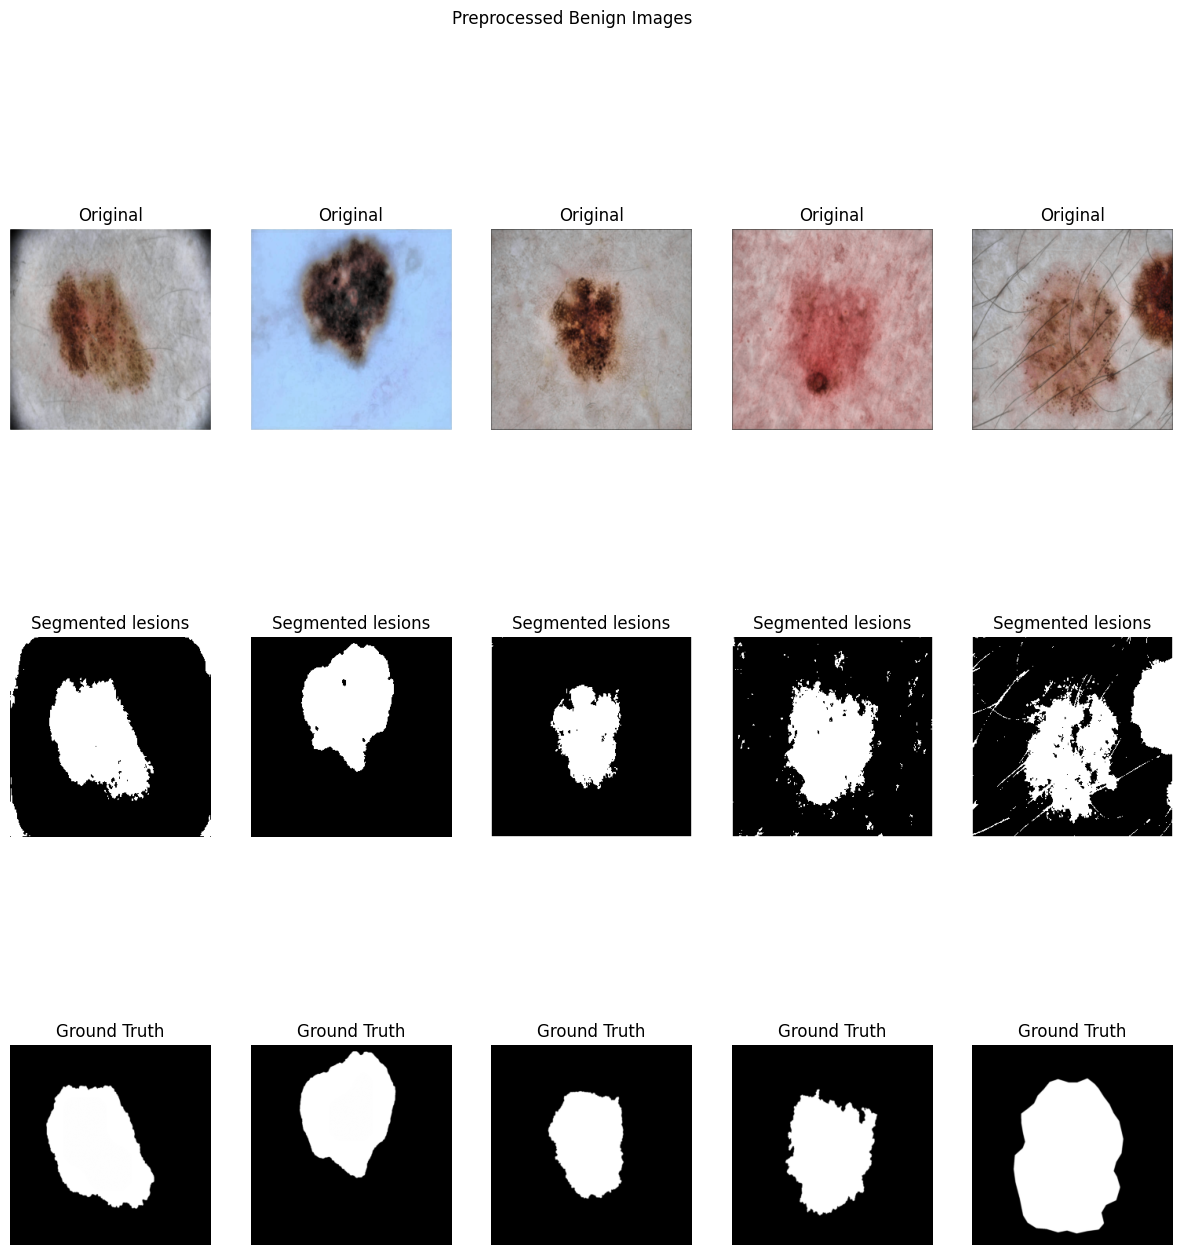

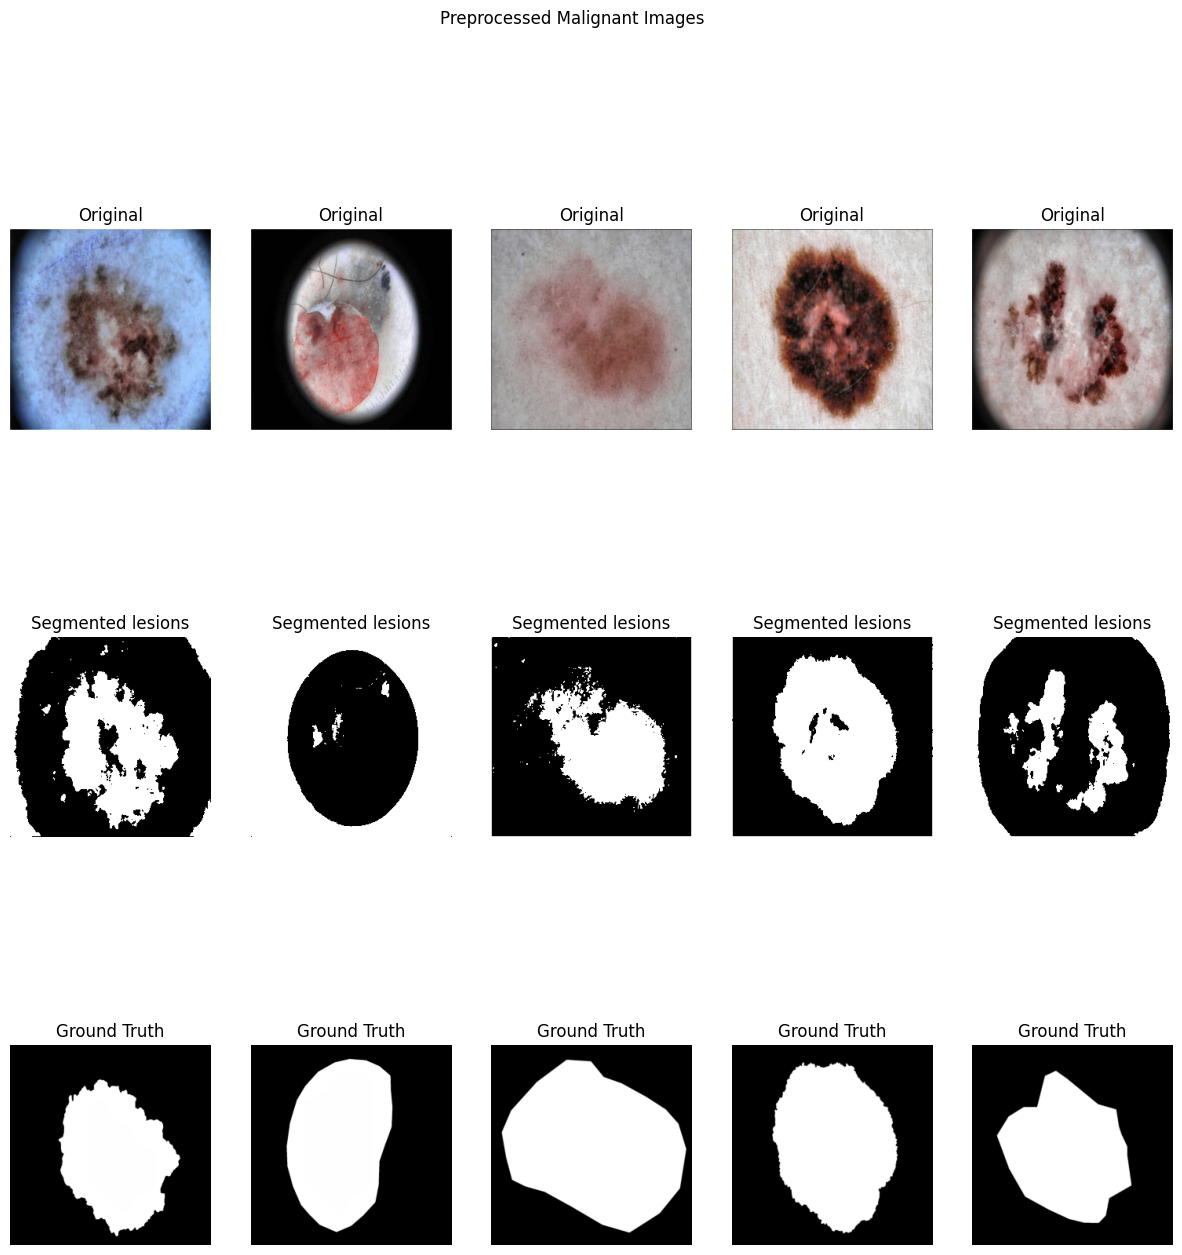

K-means clustering, grayscale visualization, and ground truth comparison completed.


In [ ]:

import numpy as np
from skimage import io, color, exposure, transform, filters
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix

benign_cases = [
    "ISIC_0000009", "ISIC_0000016", "ISIC_0000017", "ISIC_0000025", "ISIC_0000032",
]

malignant_cases = [
    "ISIC_0000002", "ISIC_0000004", "ISIC_0000026", "ISIC_0000029", "ISIC_0000031",
]


image_dir = '/content/assign_train'

benign_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in benign_cases]
malignant_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in malignant_cases]

def load_images(image_paths):
    images = []
    for path in image_paths:
        try:
            img = io.imread(path)
            images.append(img)
        except FileNotFoundError:
            print(f"File not found: {path}")
    return images

def preprocess_images(images, target_size=(256, 256)):
    preprocessed_images = []

    for img in images:

        img_filtered = filters.median(img)

        img_contrast_enhanced = exposure.equalize_adapthist(img_filtered)

        img_resized = transform.resize(img_contrast_enhanced, target_size)

        preprocessed_images.append(img_resized)

    return np.array(preprocessed_images)

benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

preprocessed_benign_images = preprocess_images(benign_images)
preprocessed_malignant_images = preprocess_images(malignant_images)

# Apply K-means clustering to an image
def apply_kmeans(image, n_clusters=2):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(pixels)

    # Replace each pixel value with its corresponding cluster center value
    clustered_img = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape the clustered image back to the original image shape
    clustered_img = clustered_img.reshape(image.shape)

    return clustered_img

# Convert clustered images to grayscale and invert colors
def convert_to_grayscale_and_invert(images):
    grayscale_images = [color.rgb2gray(img) for img in images]
    inverted_images = [1 - img for img in grayscale_images]
    return inverted_images

# Apply K-means clustering to benign and malignant images
clustered_benign_images = [apply_kmeans(img) for img in preprocessed_benign_images]
clustered_malignant_images = [apply_kmeans(img) for img in preprocessed_malignant_images]

# Convert clustered images to grayscale and invert colors
inverted_clustered_benign_images = convert_to_grayscale_and_invert(clustered_benign_images)
inverted_clustered_malignant_images = convert_to_grayscale_and_invert(clustered_malignant_images)

ground_truth_image_paths = [
os.path.join(image_dir, f"{case}_Segmentation.png")
for case in benign_cases + malignant_cases  # Iterate through both benign and malignant cases
]

ground_truth_images = load_images(ground_truth_image_paths)
ground_truth_images = preprocess_images(ground_truth_images)
# Flatten images for comparison
def flatten_images(images):
    return [img.flatten() for img in images]

# Flatten clustered and ground truth images
flattened_clustered = flatten_images(inverted_clustered_benign_images + inverted_clustered_malignant_images)
flattened_ground_truth = flatten_images(ground_truth_images)

min_length = min(len(flattened_clustered), len(flattened_ground_truth))
flattened_clustered = flattened_clustered[:min_length]
flattened_ground_truth = flattened_ground_truth[:min_length]
# Assuming binary classification (0 for background, 1 for lesion)
binary_clustered = np.array([1 if pixel > 0.5 else 0 for img in flattened_clustered for pixel in img])
binary_ground_truth = np.array([1 if pixel > 0.5 else 0 for img in flattened_ground_truth for pixel in img])
binary_clustered = binary_clustered[:len(binary_ground_truth)]

# Calculate metrics
f1 = f1_score(binary_ground_truth, binary_clustered, zero_division=1)
precision = precision_score(binary_ground_truth, binary_clustered, zero_division=1)
accuracy = accuracy_score(binary_ground_truth, binary_clustered)
recall = recall_score(binary_ground_truth, binary_clustered, zero_division=1)

# Calculate sensitivity and specificity
cm = confusion_matrix(binary_ground_truth, binary_clustered)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print results
print("F1 Score:", f1)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Specificity:", specificity)

# Function to visualize images
def visualize_images(original_images, clustered_images, ground_truth_images, title, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(original_images[i])
        plt.axis('off')
        plt.title('Original')

        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(clustered_images[i], cmap='gray')
        plt.axis('off')
        plt.title('Segmented lesions')

        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(ground_truth_images[i], cmap='gray')
        plt.axis('off')
        plt.title('Ground Truth')

    plt.suptitle(title)
    plt.show()

# Visualize original, clustered, and ground truth images for benign cases
visualize_images(preprocessed_benign_images, inverted_clustered_benign_images, ground_truth_images[:len(preprocessed_benign_images)], title='Preprocessed Benign Images', num_images=5)

# Visualize original, clustered, and ground truth images for malignant cases
visualize_images(preprocessed_malignant_images, inverted_clustered_malignant_images, ground_truth_images[len(preprocessed_malignant_images):], title='Preprocessed Malignant Images', num_images=5)

print("K-means clustering, grayscale visualization, and ground truth comparison completed.")


Preprocessed Images for Test Data (Benign and Malignant)

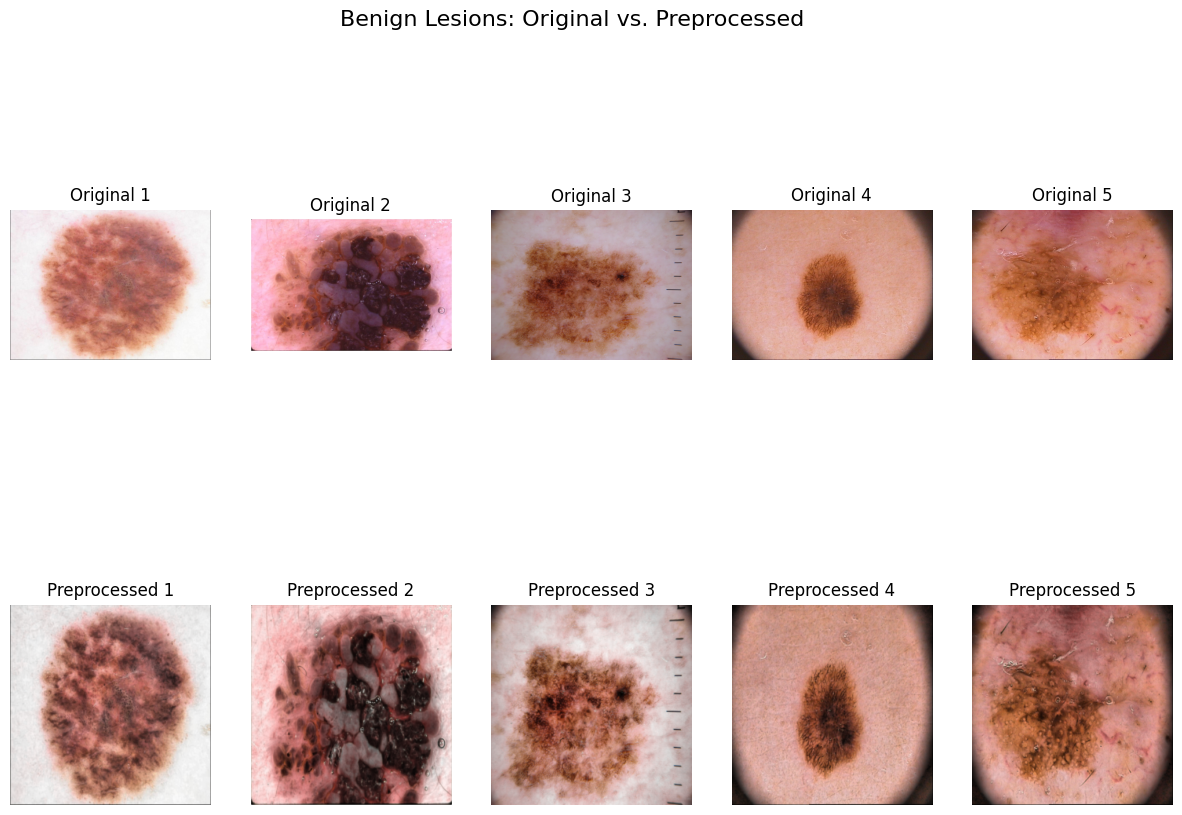

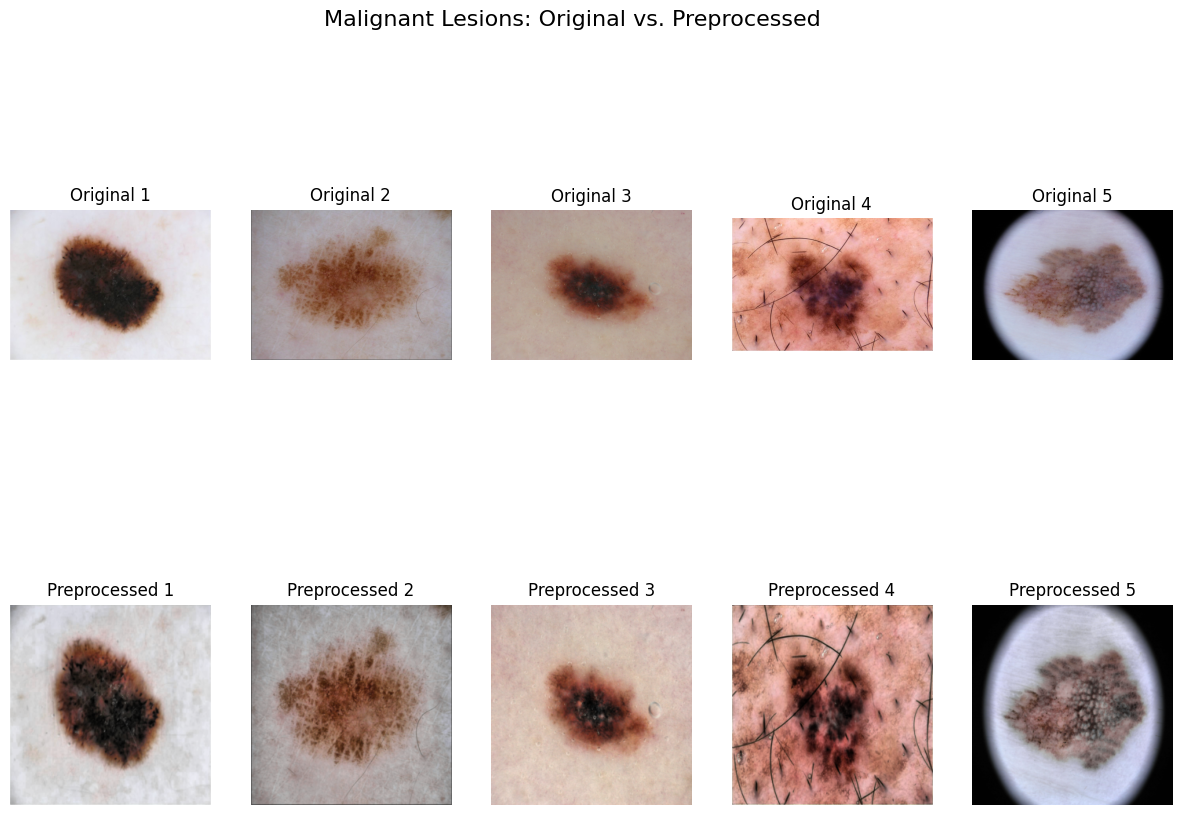

Preprocessing and visualization completed.


In [ ]:
import numpy as np
from skimage import io, exposure, transform, filters
import matplotlib.pyplot as plt
import os

benign_cases = [
    "ISIC_0000052", "ISIC_0000195", "ISIC_0000258", "ISIC_0000340", "ISIC_0000343"
]

malignant_cases = [
    "ISIC_0000013", "ISIC_0000022", "ISIC_0000141", "ISIC_0000164", "ISIC_0000287"
]

image_dir = '/content/assign_test'

benign_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in benign_cases]
malignant_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in malignant_cases]

def load_images(image_paths):
    images = []
    for path in image_paths:
        try:
            img = io.imread(path)
            images.append(img)
        except FileNotFoundError:
            print(f"File not found: {path}")
    return images

def preprocess_images(images, target_size=(256, 256)):
    preprocessed_images = []
    for img in images:
        img_filtered = filters.median(img)
        img_contrast_enhanced = exposure.equalize_adapthist(img_filtered)
        img_resized = transform.resize(img_contrast_enhanced, target_size)
        preprocessed_images.append(img_resized)
    return np.array(preprocessed_images)

def visualize_comparison(original_images, preprocessed_images, title, num_images=5):
    plt.figure(figsize=(15, 10))

    for i in range(num_images):
        if i >= len(original_images) or i >= len(preprocessed_images):
            break

        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[i])
        plt.title(f"Original {i+1}")
        plt.axis('off')

        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(preprocessed_images[i])
        plt.title(f"Preprocessed {i+1}")
        plt.axis('off')

    plt.suptitle(title, fontsize=16)
    plt.show()

# Load and preprocess images
benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

preprocessed_benign_images = preprocess_images(benign_images)
preprocessed_malignant_images = preprocess_images(malignant_images)

# Visualize benign images
if len(benign_images) > 0 and len(preprocessed_benign_images) > 0:
    visualize_comparison(benign_images, preprocessed_benign_images, title="Benign Lesions: Original vs. Preprocessed")

# Visualize malignant images
if len(malignant_images) > 0 and len(preprocessed_malignant_images) > 0:
    visualize_comparison(malignant_images, preprocessed_malignant_images, title="Malignant Lesions: Original vs. Preprocessed")


print("Preprocessing and visualization completed.")

SEGMENTATION : Comparing segmented lesions with ground truth and calculating F1 score

F1 Score: 0.7467442836119703
Precision: 0.7902873312015459
Accuracy: 0.8222244262695313
Recall: 0.7077489163219224
Specificity: 0.8895480143844446


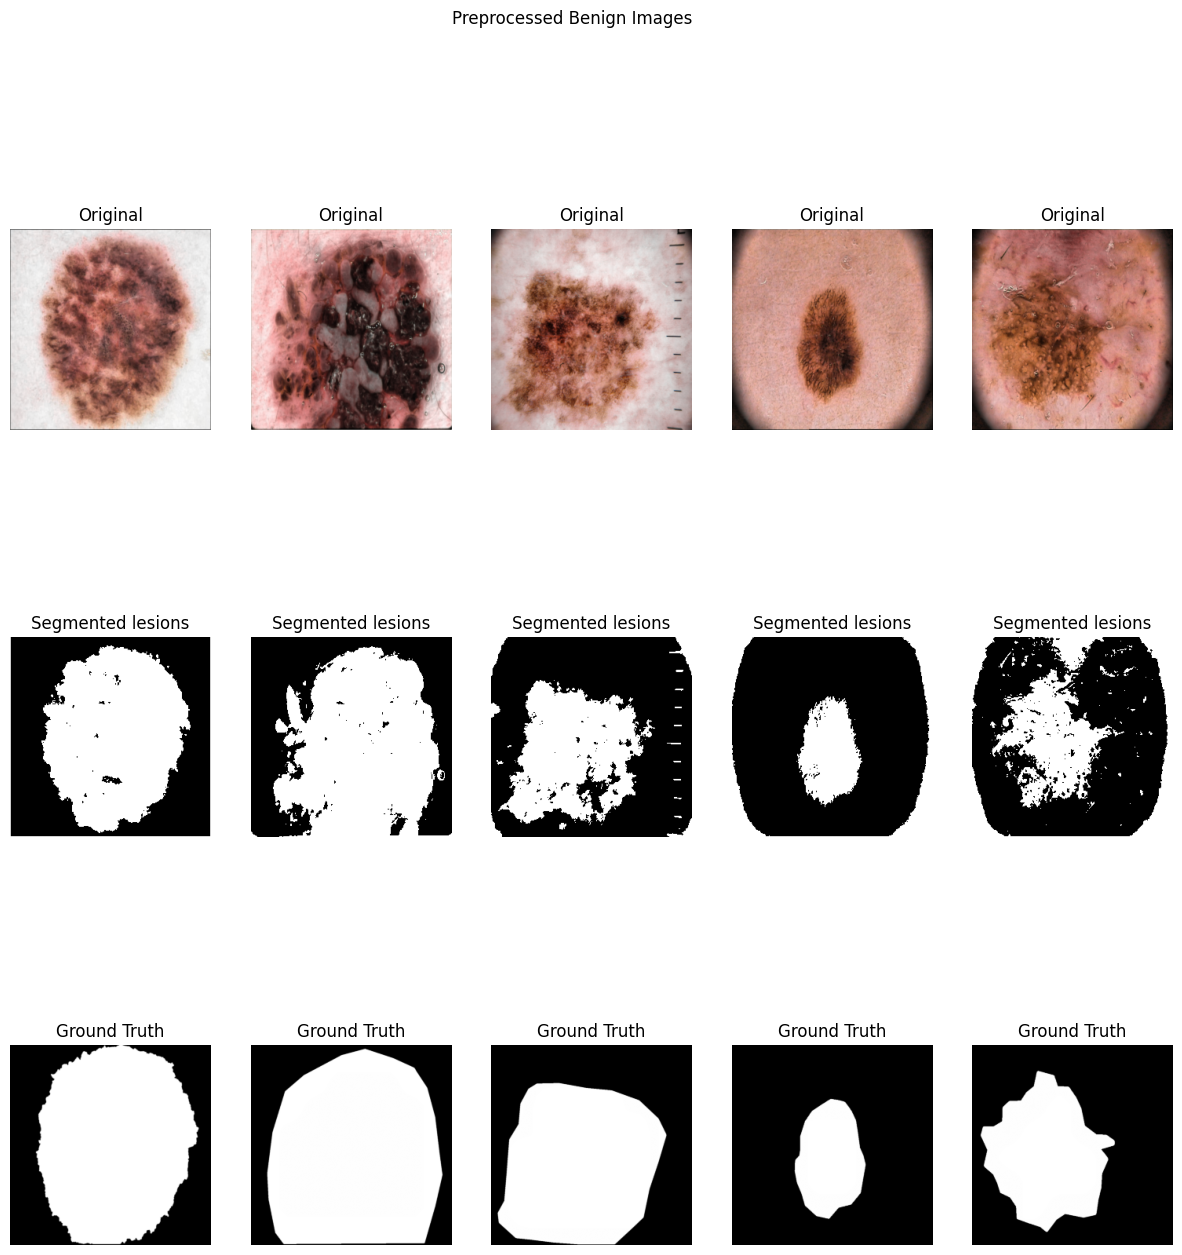

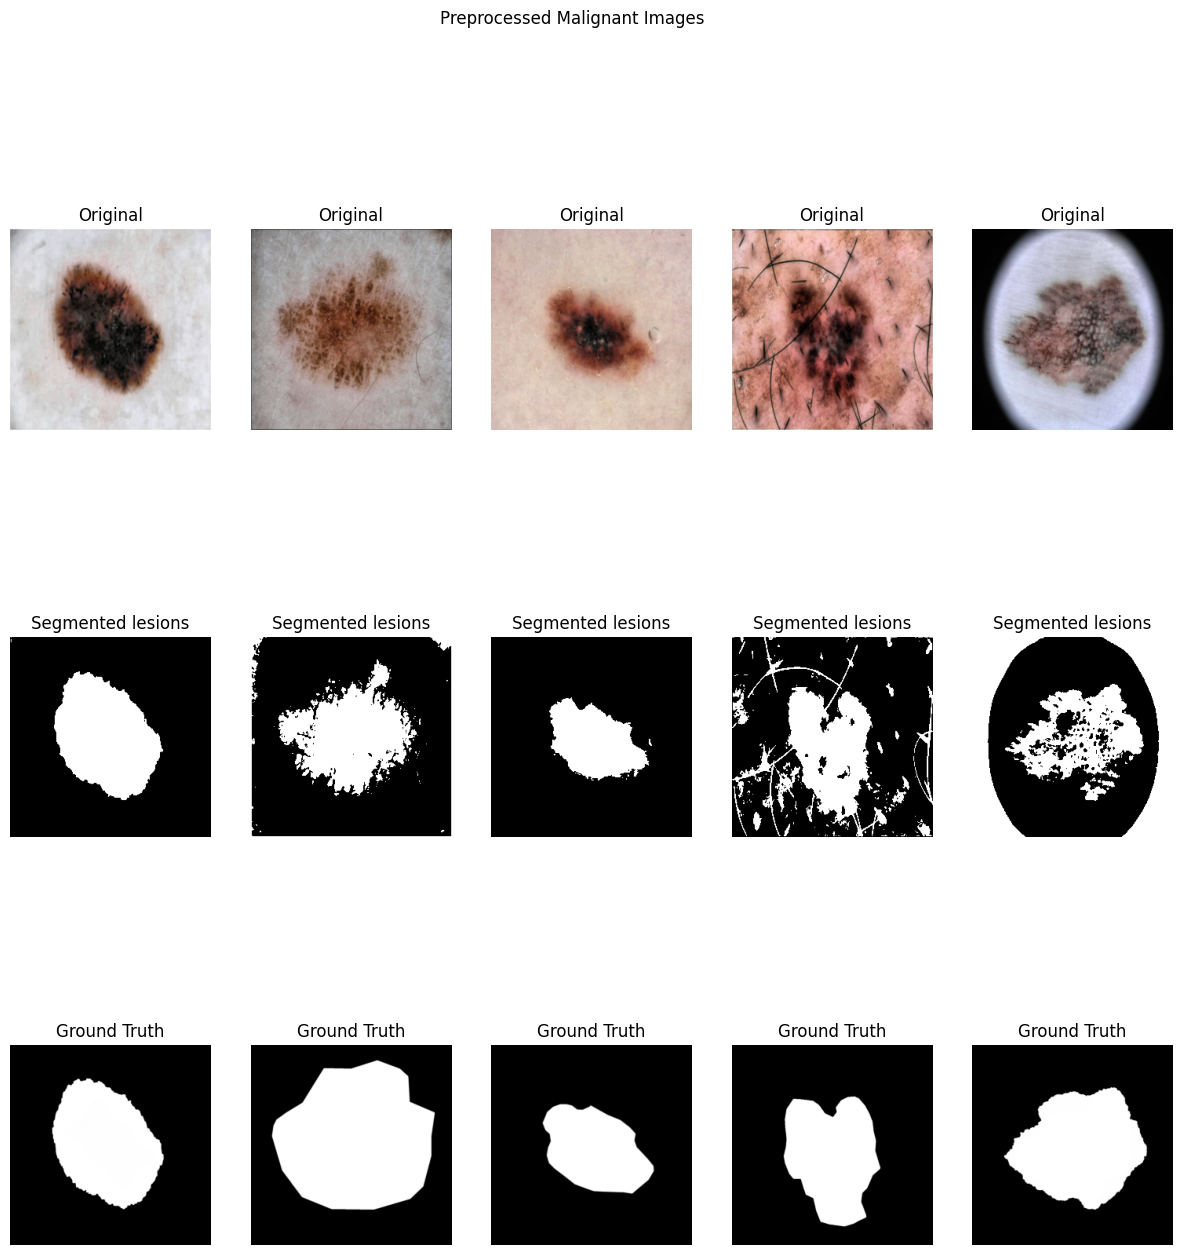

K-means clustering, grayscale visualization, and ground truth comparison completed.


In [ ]:

import numpy as np
from skimage import io, color, exposure, transform, filters
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix

benign_cases = [
    "ISIC_0000052", "ISIC_0000195", "ISIC_0000258", "ISIC_0000340", "ISIC_0000343",
]

malignant_cases = [
    "ISIC_0000013", "ISIC_0000022", "ISIC_0000141", "ISIC_0000164", "ISIC_0000287",
]

image_dir = '/content/assign_test'

benign_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in benign_cases]
malignant_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in malignant_cases]

def load_images(image_paths):
    images = []
    for path in image_paths:
        try:
            img = io.imread(path)
            images.append(img)
        except FileNotFoundError:
            print(f"File not found: {path}")
    return images

def preprocess_images(images, target_size=(256, 256)):
    preprocessed_images = []

    for img in images:

        img_filtered = filters.median(img)

        img_contrast_enhanced = exposure.equalize_adapthist(img_filtered)

        img_resized = transform.resize(img_contrast_enhanced, target_size)

        preprocessed_images.append(img_resized)

    return np.array(preprocessed_images)

benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

preprocessed_benign_images = preprocess_images(benign_images)
preprocessed_malignant_images = preprocess_images(malignant_images)

def apply_kmeans(image, n_clusters=2):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(pixels)

    # Replace each pixel value with its corresponding cluster center value
    clustered_img = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape the clustered image back to the original image shape
    clustered_img = clustered_img.reshape(image.shape)

    return clustered_img

# Convert clustered images to grayscale and invert colors
def convert_to_grayscale_and_invert(images):
    grayscale_images = [color.rgb2gray(img) for img in images]
    inverted_images = [1 - img for img in grayscale_images]  # Invert colors
    return inverted_images

# Apply K-means clustering to benign and malignant images
clustered_benign_images = [apply_kmeans(img) for img in preprocessed_benign_images]
clustered_malignant_images = [apply_kmeans(img) for img in preprocessed_malignant_images]

# Convert clustered images to grayscale and invert colors
inverted_clustered_benign_images = convert_to_grayscale_and_invert(clustered_benign_images)
inverted_clustered_malignant_images = convert_to_grayscale_and_invert(clustered_malignant_images)

# Load ground truth images

ground_truth_image_paths = [
os.path.join(image_dir, f"{case}_Segmentation.png")
for case in benign_cases + malignant_cases
]

ground_truth_images = load_images(ground_truth_image_paths)
ground_truth_images = preprocess_images(ground_truth_images)
# Flatten images for comparison
def flatten_images(images):
    return [img.flatten() for img in images]

# Flatten clustered and ground truth images
flattened_clustered = flatten_images(inverted_clustered_benign_images + inverted_clustered_malignant_images)
flattened_ground_truth = flatten_images(ground_truth_images)

min_length = min(len(flattened_clustered), len(flattened_ground_truth))
flattened_clustered = flattened_clustered[:min_length]
flattened_ground_truth = flattened_ground_truth[:min_length]
# Assuming binary classification (0 for background, 1 for lesion)
binary_clustered = np.array([1 if pixel > 0.5 else 0 for img in flattened_clustered for pixel in img])
binary_ground_truth = np.array([1 if pixel > 0.5 else 0 for img in flattened_ground_truth for pixel in img])
binary_clustered = binary_clustered[:len(binary_ground_truth)]

# Calculate metrics
f1 = f1_score(binary_ground_truth, binary_clustered, zero_division=1)
precision = precision_score(binary_ground_truth, binary_clustered, zero_division=1)
accuracy = accuracy_score(binary_ground_truth, binary_clustered)
recall = recall_score(binary_ground_truth, binary_clustered, zero_division=1)

# Calculate sensitivity and specificity
cm = confusion_matrix(binary_ground_truth, binary_clustered)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print results
print("F1 Score:", f1)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Specificity:", specificity)

# Function to visualize images
def visualize_images(original_images, clustered_images, ground_truth_images, title, num_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(3, num_images, i + 1)
        plt.imshow(original_images[i])
        plt.axis('off')
        plt.title('Original')

        plt.subplot(3, num_images, num_images + i + 1)
        plt.imshow(clustered_images[i], cmap='gray')
        plt.axis('off')
        plt.title('Segmented lesions')

        plt.subplot(3, num_images, 2 * num_images + i + 1)
        plt.imshow(ground_truth_images[i], cmap='gray')
        plt.axis('off')
        plt.title('Ground Truth')

    plt.suptitle(title)
    plt.show()

# Visualize original, clustered, and ground truth images for benign cases
visualize_images(preprocessed_benign_images, inverted_clustered_benign_images, ground_truth_images[:len(preprocessed_benign_images)], title='Preprocessed Benign Images', num_images=5)

# Visualize original, clustered, and ground truth images for malignant cases
visualize_images(preprocessed_malignant_images, inverted_clustered_malignant_images, ground_truth_images[len(preprocessed_malignant_images):], title='Preprocessed Malignant Images', num_images=5)

print("K-means clustering, grayscale visualization, and ground truth comparison completed.")


  Shape Features of Test Data Images

In [ ]:
import numpy as np
from skimage import io, color, measure, transform, filters, morphology, exposure
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix

benign_cases = [
    "ISIC_0000052", "ISIC_0000195", "ISIC_0000258", "ISIC_0000340", "ISIC_0000343"
]

malignant_cases = [
    "ISIC_0000013", "ISIC_0000022", "ISIC_0000141", "ISIC_0000164", "ISIC_0000287"
]

image_dir = '/content/assign_test'

benign_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in benign_cases]
malignant_image_paths = [os.path.join(image_dir, f"{case}.jpg") for case in malignant_cases]

def load_images(image_paths):
    images = []
    for path in image_paths:
        try:
            img = io.imread(path)
            images.append(img)
        except FileNotFoundError:
            print(f"File not found: {path}")
    return images

def preprocess_images(images, target_size=(256, 256)):
    preprocessed_images = []

    for img in images:

        img_filtered = filters.median(img)

        img_contrast_enhanced = exposure.equalize_adapthist(img_filtered)

        img_resized = transform.resize(img_contrast_enhanced, target_size)

        preprocessed_images.append(img_resized)

    return np.array(preprocessed_images)

benign_images = load_images(benign_image_paths)
malignant_images = load_images(malignant_image_paths)

preprocessed_benign_images = preprocess_images(benign_images)
preprocessed_malignant_images = preprocess_images(malignant_images)

# Apply K-means clustering to an image
def apply_kmeans(image, n_clusters=2):
    # Reshape the image to a 2D array of pixels
    pixels = image.reshape(-1, 3)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(pixels)

    # Replace each pixel value with its corresponding cluster center value
    clustered_img = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape the clustered image back to the original image shape
    clustered_img = clustered_img.reshape(image.shape)

    return clustered_img

# Convert clustered images to grayscale and invert colors
def convert_to_grayscale_and_invert(images):
    grayscale_images = [color.rgb2gray(img) for img in images]
    inverted_images = [1 - img for img in grayscale_images]  # Invert colors
    return inverted_images

# Apply K-means clustering to benign and malignant images
clustered_benign_images = [apply_kmeans(img) for img in preprocessed_benign_images]
clustered_malignant_images = [apply_kmeans(img) for img in preprocessed_malignant_images]

# Convert clustered images to grayscale and invert colors
inverted_clustered_benign_images = convert_to_grayscale_and_invert(clustered_benign_images)
inverted_clustered_malignant_images = convert_to_grayscale_and_invert(clustered_malignant_images)

# Load ground truth images
ground_truth_image_paths = [
    os.path.join(image_dir, f"{case}_Segmentation.png")
    for case in benign_cases + malignant_cases  # Iterate through both benign and malignant cases
]

ground_truth_images = load_images(ground_truth_image_paths)
ground_truth_images = preprocess_images(ground_truth_images)

# Function to extract shape features
def extract_shape_features(images):
    shape_features = []

    for img in images:
        # Apply threshold to get binary image
        binary_img = img > filters.threshold_mean(img)
        binary_img = morphology.remove_small_objects(binary_img, min_size=500)  # Remove noise
        # Label connected regions
        labeled_img = measure.label(binary_img)
        # Extract region properties
        regions = measure.regionprops(labeled_img)

        for region in regions:
            if region.area < 100:  # Ignore small artifacts
                continue

            # Compute shape features
            perimeter = region.perimeter if region.perimeter > 0 else 1
            compactness = (perimeter ** 2) / (4 * np.pi * region.area)  # Circularity measure
            convex_hull = morphology.convex_hull_image(binary_img)
            convex_perimeter = measure.perimeter(convex_hull)
            border_irregularity = convex_perimeter / perimeter

            # Compute asymmetry index
            center_x = region.centroid[1]
            left_half = binary_img[:, :int(center_x)]
            right_half = binary_img[:, int(center_x):]
            asymmetry_index = abs(np.sum(left_half) - np.sum(right_half)) / region.area

            features = {
                'area': region.area,
                'perimeter': perimeter,
                'eccentricity': region.eccentricity,
                'solidity': region.solidity,
                'compactness': compactness,
                'border_irregularity': border_irregularity,
                'asymmetry_index': asymmetry_index
            }
            shape_features.append(features)
    return shape_features

# Extract shape features from inverted clustered and ground truth images
benign_shape_features = extract_shape_features(inverted_clustered_benign_images)
malignant_shape_features = extract_shape_features(inverted_clustered_malignant_images)

# Print results
print("Shape features for benign lesions:")
for feature in benign_shape_features[:5]:
    print(feature)

print("\nShape features for malignant lesions:")
for feature in malignant_shape_features[:5]:
    print(feature)

Shape features for benign lesions:
{'area': np.float64(1020.0), 'perimeter': np.float64(1020.0), 'eccentricity': 0.0, 'solidity': np.float64(0.01556396484375), 'compactness': np.float64(81.16902097686662), 'border_irregularity': np.float64(1.0), 'asymmetry_index': np.float64(2.4990196078431373)}
{'area': np.float64(31893.0), 'perimeter': np.float64(1339.319984622144), 'eccentricity': 0.6467096248349354, 'solidity': np.float64(0.9213103388508537), 'compactness': np.float64(4.475725690353576), 'border_irregularity': np.float64(0.7615805122834539), 'asymmetry_index': np.float64(0.007493807418555796)}
{'area': np.float64(37764.0), 'perimeter': np.float64(2196.5352800987935), 'eccentricity': 0.607322200475332, 'solidity': np.float64(0.8229064522455384), 'compactness': np.float64(10.16689909691245), 'border_irregularity': np.float64(0.38729986652221143), 'asymmetry_index': np.float64(0.029551954242135366)}
{'area': np.float64(563.0), 'perimeter': np.float64(151.3198051533946), 'eccentricity'